In [330]:
from google.colab import files
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np

In [231]:
# uploaded = files.upload()

In [334]:
data  = pd.read_csv('Billionaires Statistics Dataset.csv')

In [335]:
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

## **Cleaning Data**

In [337]:
# Dropping unnecessary columns
data = data.drop(columns=['organization', 'title', 'state', 'residenceStateRegion'])

# Further handling missing values after dropping columns
data.isnull().sum()

# Dropping additional columns
data = data.drop(columns=['cpi_country', 'cpi_change_country', 'life_expectancy_country', 'tax_revenue_country_country',
                          'latitude_country', 'longitude_country', 'city', 'date', 'birthDate', 'birthYear', 'birthMonth', 'birthDay','status','countryOfCitizenship','category'])

# Handling missing values in the 'country' column
data['country'].fillna('Unknown', inplace=True)
data.isnull().sum()

<ipython-input-337-ca16774af892>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('Unknown', inplace=True)


,0
rank,0
finalWorth,0
personName,0
age,65
country,0
source,0
industries,0
selfMade,0
gender,0
lastName,0


In [338]:
# Checking data types and fixing 'gdp_country' data type
data.dtypes
data['gdp_country'] = data['gdp_country'].str.replace('$', '')
data['gdp_country'] = data['gdp_country'].str.replace(',', '')
data['gdp_country'] = pd.to_numeric(data['gdp_country'])


In [339]:
# Handling missing values using SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
data[['age', 'gdp_country', 'gross_tertiary_education_enrollment', 'total_tax_rate_country']] = mean_imputer.fit_transform(data[['age', 'gdp_country', 'gross_tertiary_education_enrollment', 'total_tax_rate_country']])
median_imputer = SimpleImputer(strategy='median')
data[['gross_primary_education_enrollment_country', 'population_country']] = median_imputer.fit_transform(data[['gross_primary_education_enrollment_country', 'population_country']])

In [340]:
# Checking for remaining missing values
data.isnull().sum()

,0
rank,0
finalWorth,0
personName,0
age,0
country,0
source,0
industries,0
selfMade,0
gender,0
lastName,0


In [341]:
data.head()

,rank,finalWorth,personName,age,country,source,industries,selfMade,gender,lastName,firstName,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,total_tax_rate_country,population_country
0,1,211000,Bernard Arnault & family,74.0,France,LVMH,Fashion & Retail,False,M,Arnault,Bernard,2.715518e+12,65.6,102.5,60.7,67059887.0
1,2,180000,Elon Musk,51.0,United States,"Tesla, SpaceX",Automotive,True,M,Musk,Elon,2.142770e+13,88.2,101.8,36.6,328239523.0
2,3,114000,Jeff Bezos,59.0,United States,Amazon,Technology,True,M,Bezos,Jeff,2.142770e+13,88.2,101.8,36.6,328239523.0
3,4,107000,Larry Ellison,78.0,United States,Oracle,Technology,True,M,Ellison,Larry,2.142770e+13,88.2,101.8,36.6,328239523.0
4,5,106000,Warren Buffett,92.0,United States,Berkshire Hathaway,Finance & Investments,True,M,Buffett,Warren,2.142770e+13,88.2,101.8,36.6,328239523.0


# **Explanatory Data Analysis**

## **Final Worth Analysis**

In [342]:
data['finalWorth'].describe()

,finalWorth
count,2640.000000
mean,4623.787879
std,9834.240939
min,1000.000000
25%,1500.000000
50%,2300.000000
75%,4200.000000
max,211000.000000


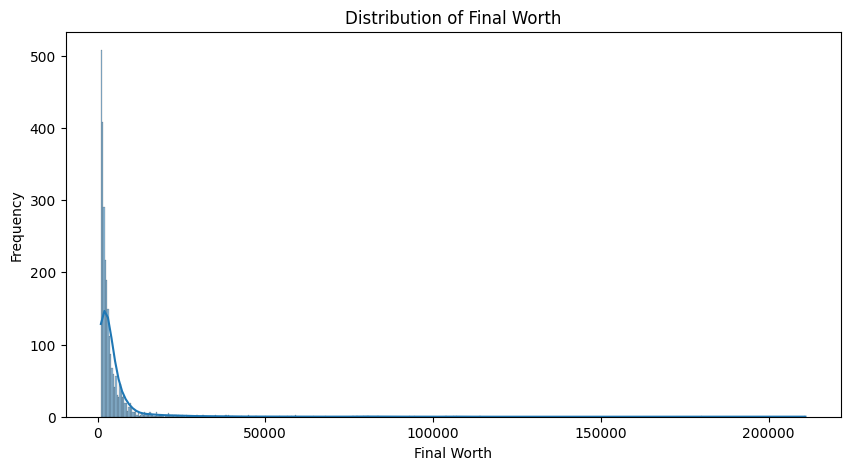

In [343]:
plot.figure(figsize=(10, 5))
sns.histplot(data['finalWorth'], kde=True)
plot.title('Distribution of Final Worth')
plot.xlabel('Final Worth')
plot.ylabel('Frequency')
plot.show()

## **Age Analysis**

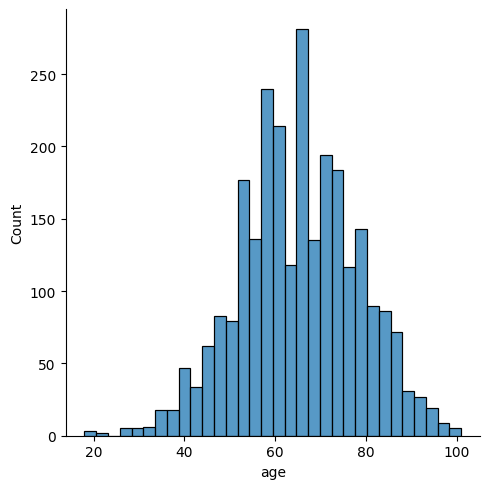

In [344]:
sns.displot(data['age'])

In [345]:
bins = [20, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
data_copy = data.copy()

data_copy['age_group'] = pd.cut(data_copy['age'], bins=bins, labels=labels, right=False)
age_counts = data_copy['age_group'].value_counts().sort_index()
print(age_counts)


age_group
20-30      9
31-40     56
41-50    216
51-60    632
61-70    748
71-80    595
81+      382
Name: count, dtype: int64


## **Gender alalysis**

In [346]:
data['gender'].value_counts()

,count
gender,
M,2303
F,337


<Axes: xlabel='count', ylabel='gender'>

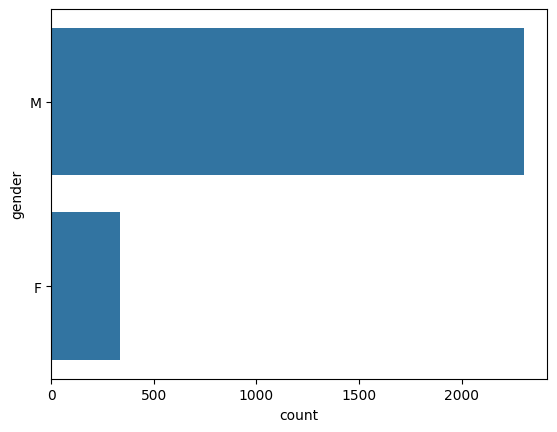

In [347]:
sns.countplot(data['gender'])

## **Country Analysis**

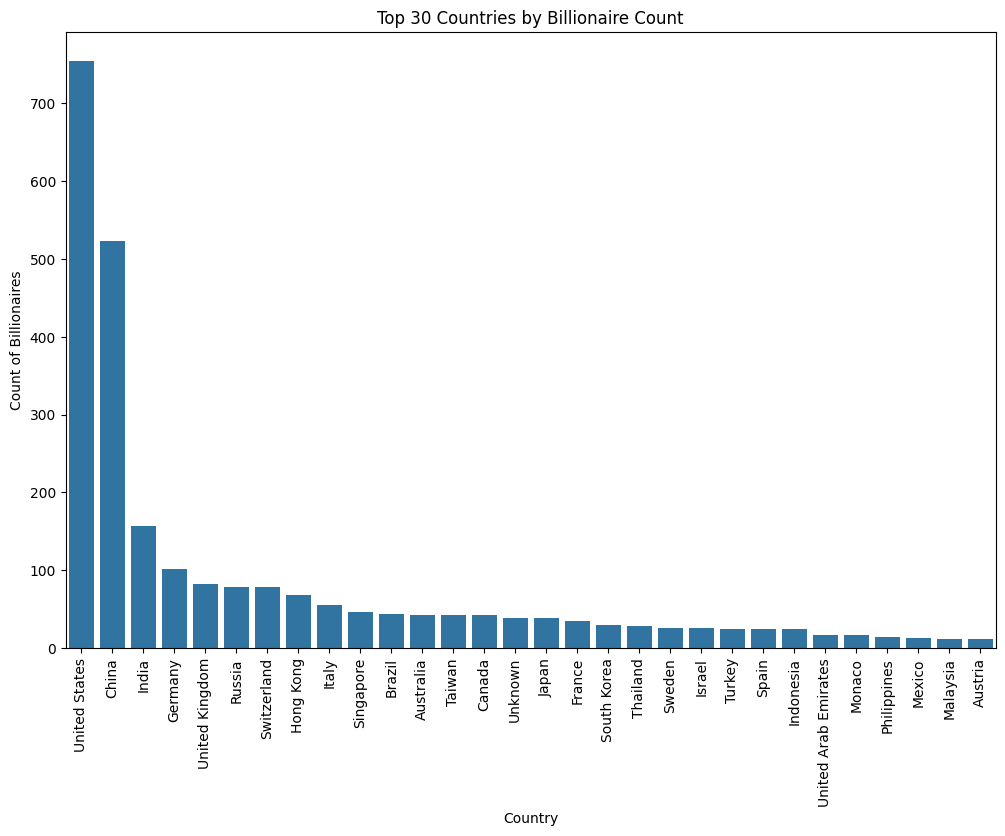

In [348]:
# Get the top 30 countries by count
top_30_countries = data['country'].value_counts().nlargest(30).index

# Filter the data to include only the top 30 countries
top_30_data = data[data['country'].isin(top_30_countries)]

# Create the countplot
plot.figure(figsize=(12, 8))
sns.countplot(x='country', data=top_30_data, order=top_30_countries)
plot.xticks(rotation=90)
plot.title('Top 30 Countries by Billionaire Count')
plot.xlabel('Country')
plot.ylabel('Count of Billionaires')
plot.show()


## **Industry Analysis**

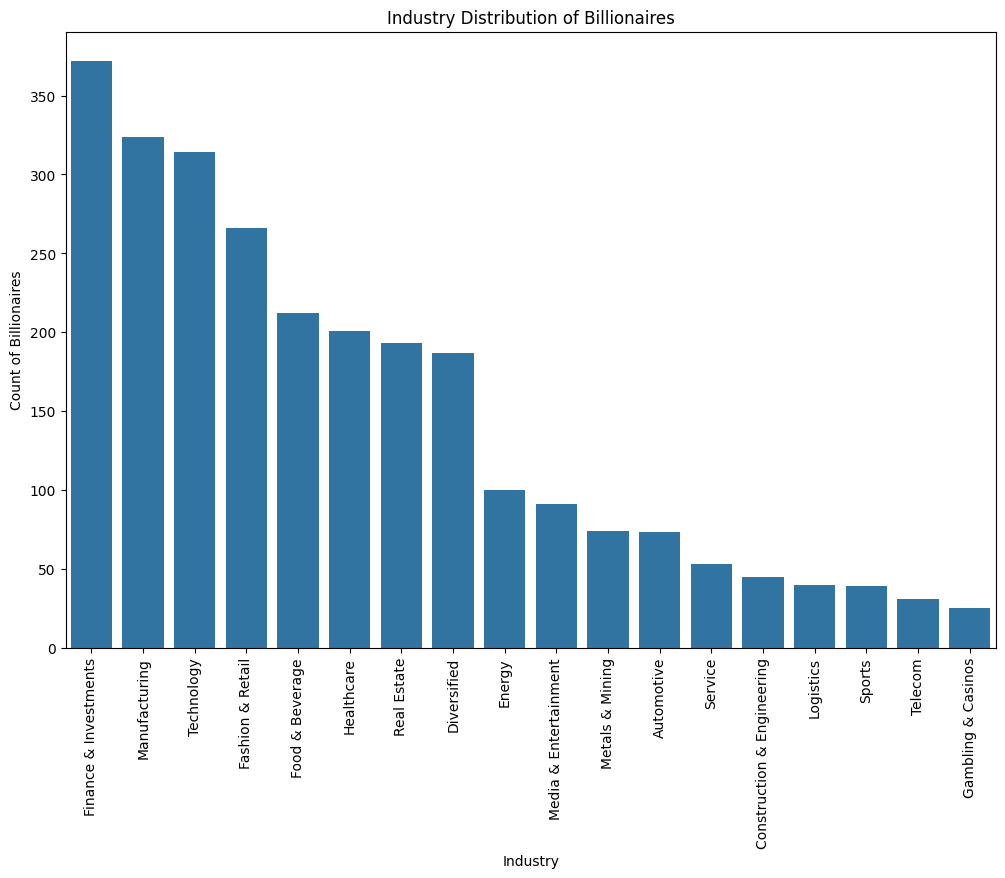

In [349]:
plot.figure(figsize=(12, 8))
sns.countplot(x='industries', data=data, order=data['industries'].value_counts().index)
plot.xticks(rotation=90)
plot.title('Industry Distribution of Billionaires')
plot.xlabel('Industry')
plot.ylabel('Count of Billionaires')
plot.show()

In [350]:
# Count of billionaires by Industry
industry_counts = data['industries'].value_counts()
print("Number of Billionaires by Industry:")
print(industry_counts)

# Average Net Worth per Industry (finalWorth)
industry_avg_wealth = data.groupby('industries')['finalWorth'].mean().sort_values(ascending=False)
print("\nAverage Net Worth per Industry (in USD):")
print(industry_avg_wealth)


Number of Billionaires by Industry:
industries
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64

Average Net Worth per Industry (in USD):
industries
Automotive                    7195.890411
Telecom                       6564.516129
Fashion & Retail              6386.466165
Metals & Mining               6037.837838
Logistics                     5987.500000
Technology                    5980.573248
Diversifie

## **Self Made Analysis**

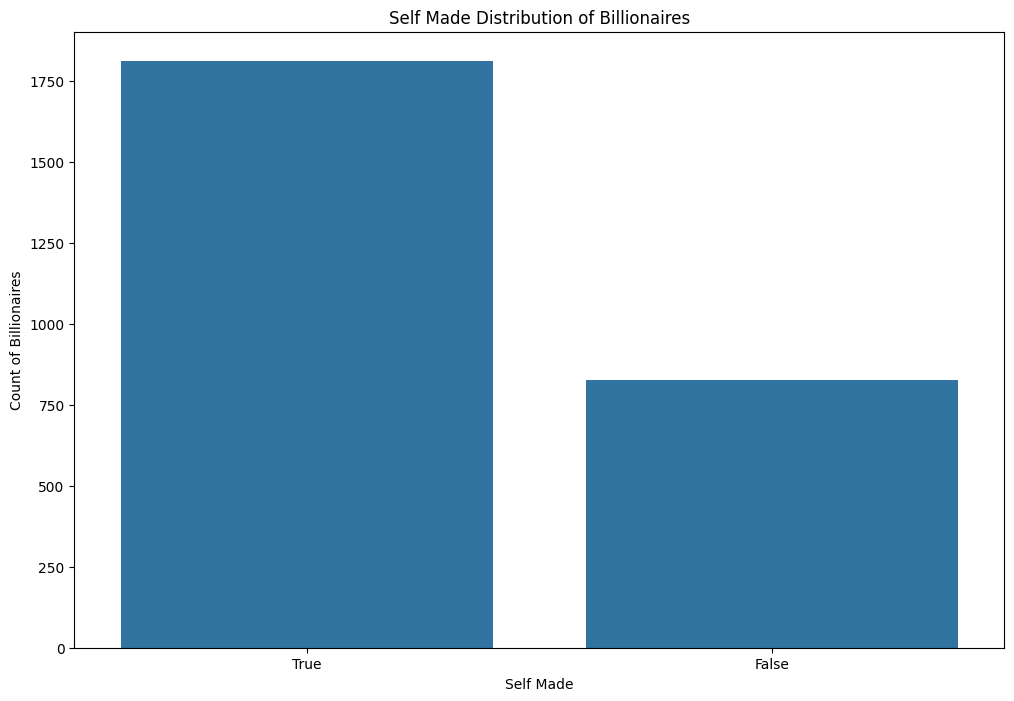

In [351]:
plot.figure(figsize=(12, 8))
sns.countplot(x='selfMade', data=data, order=data['selfMade'].value_counts().index)
plot.title('Self Made Distribution of Billionaires')
plot.xlabel('Self Made')
plot.ylabel('Count of Billionaires')
plot.show()

## **Self-Made Billionaires in the United States, China, and India**

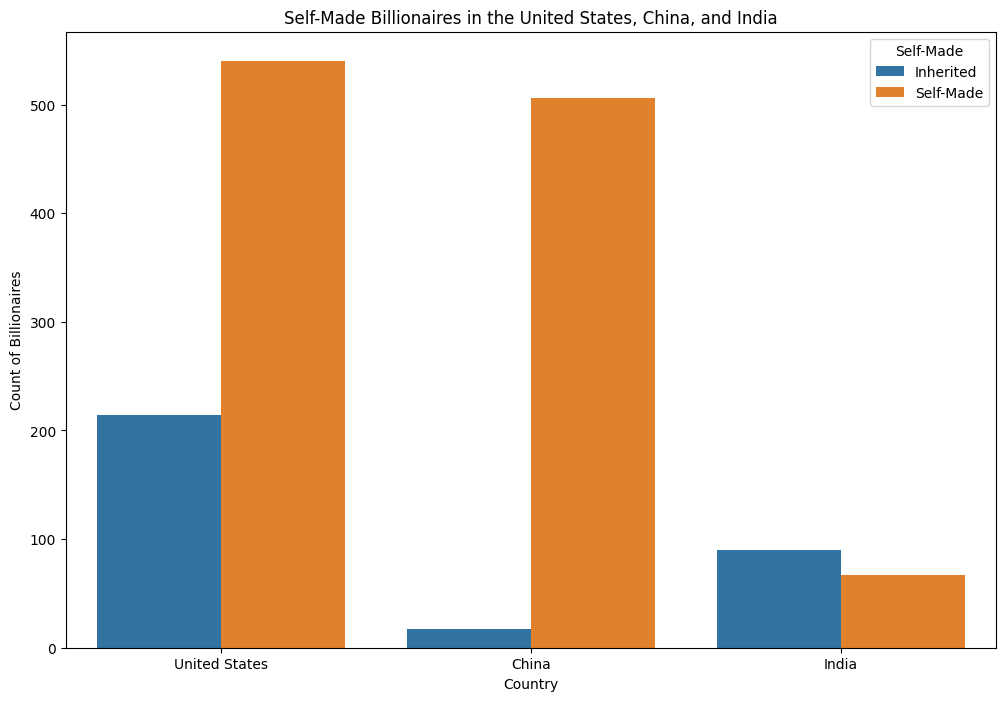

In [352]:
# Filter data for billionaires from the United States, China, and India
countries_of_interest = ['United States', 'China', 'India']
filtered_data = data[data['country'].isin(countries_of_interest)]

# Plot the self-made status of billionaires in these countries
plot.figure(figsize=(12, 8))
sns.countplot(x='country', hue='selfMade', data=filtered_data, order=countries_of_interest)
plot.title('Self-Made Billionaires in the United States, China, and India')
plot.xlabel('Country')
plot.ylabel('Count of Billionaires')
plot.legend(title='Self-Made', labels=['Inherited', 'Self-Made'])
plot.show()

## **Correlation matrix**

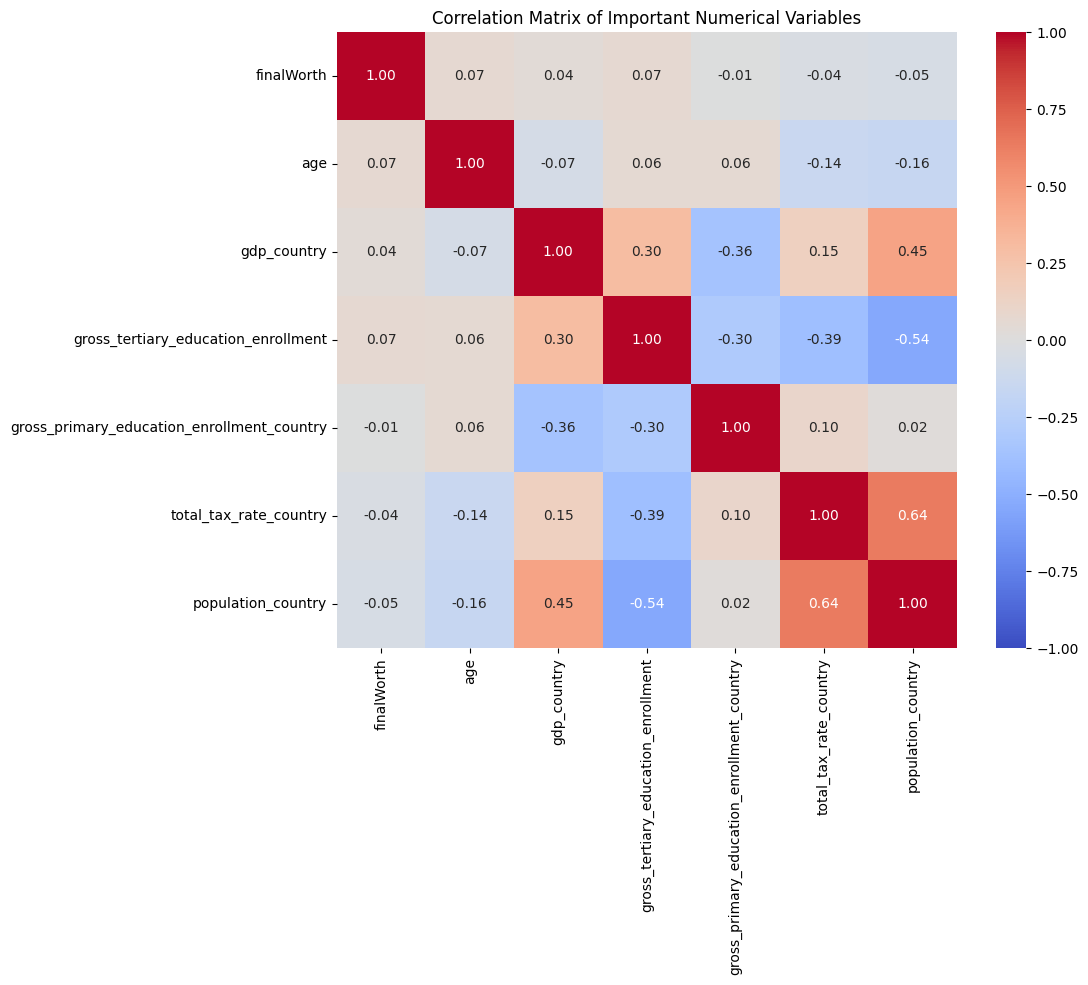

In [353]:
# For correlation, only consider numerical columns
numeric_columns = [
    'finalWorth', 'age', 'gdp_country', 'gross_tertiary_education_enrollment',
    'gross_primary_education_enrollment_country', 'total_tax_rate_country', 'population_country'
]

# Subset the data to include only numeric columns
numeric_data = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plot.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plot.title('Correlation Matrix of Important Numerical Variables')
plot.show()

# **Modeling and Interpretation**

In [354]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.inspection import permutation_importance

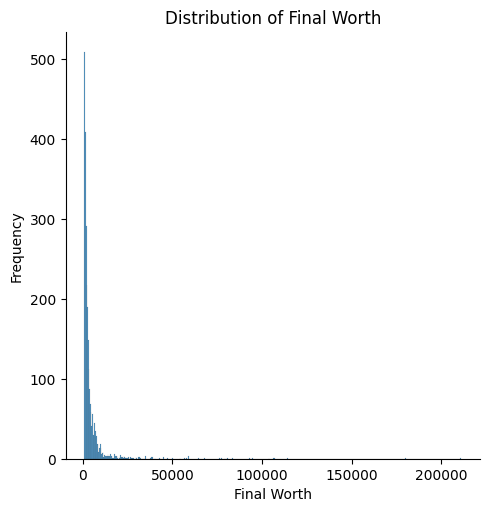

In [355]:
sns.displot(data['finalWorth'])
plot.title('Distribution of Final Worth')
plot.xlabel('Final Worth')
plot.ylabel('Frequency')
plot.show()

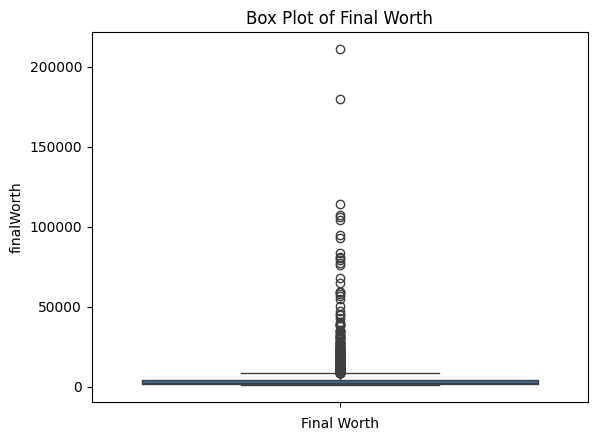

In [306]:
sns.boxplot(data['finalWorth'])
plot.title('Box Plot of Final Worth')
plot.xlabel('Final Worth')
plot.show()

In [356]:

Q1 = data['finalWorth'].quantile(0.25)
Q3 = data['finalWorth'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['finalWorth'] >= lower_bound) & (data['finalWorth'] <= upper_bound)]


data.head()

,rank,finalWorth,personName,age,country,source,industries,selfMade,gender,lastName,firstName,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,total_tax_rate_country,population_country
248,249,8200,Francis Choi,75.0,Hong Kong,Real estate,Real Estate,True,M,Choi,Francis,1.158287e+13,67.225671,101.8,43.963344,3.282395e+08
249,249,8200,German Khan,61.0,Russia,"Oil, banking, telecom",Energy,True,M,Khan,German,1.699877e+12,81.900000,102.6,46.200000,1.443735e+08
250,249,8200,Abdulsamad Rabiu,62.0,Nigeria,"Cement, sugar",Diversified,False,M,Rabiu,Abdulsamad,4.481204e+11,10.200000,84.7,34.800000,2.009636e+08
251,249,8200,George Roberts,79.0,United States,Private equity,Finance & Investments,True,M,Roberts,George,2.142770e+13,88.200000,101.8,36.600000,3.282395e+08
252,249,8200,Kushal Pal Singh,91.0,India,Real estate,Real Estate,False,M,Singh,Kushal Pal,2.611000e+12,28.100000,113.0,49.700000,1.366418e+09


In [357]:
data['finalWorth'].describe()

,finalWorth
count,2392.000000
mean,2729.891304
std,1719.917126
min,1000.000000
25%,1400.000000
50%,2100.000000
75%,3500.000000
max,8200.000000


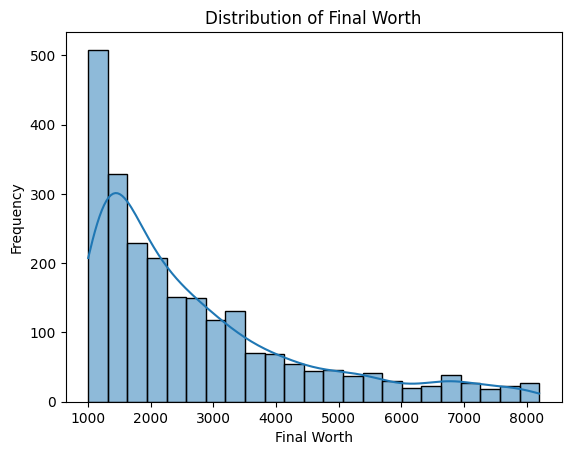

In [358]:
sns.histplot(data['finalWorth'], kde=True)
plot.title('Distribution of Final Worth')
plot.xlabel('Final Worth')
plot.ylabel('Frequency')
plot.show()

In [359]:
data['finalWorth'] = np.log(data['finalWorth'])

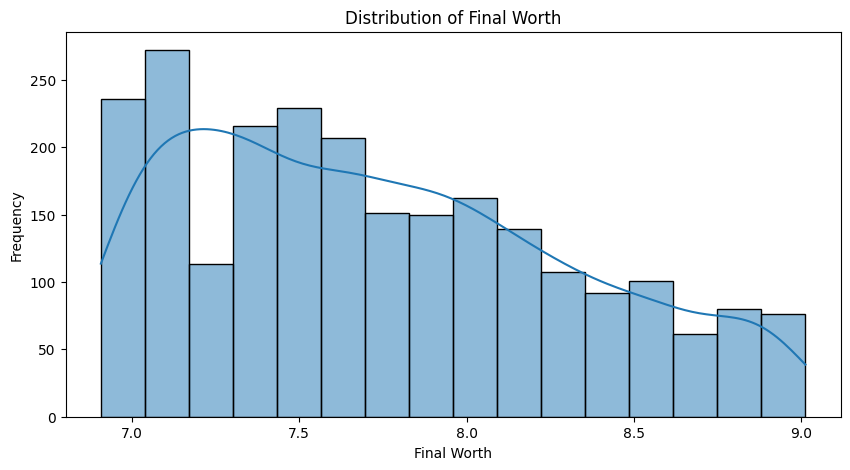

In [360]:
plot.figure(figsize=(10, 5))
sns.histplot(data['finalWorth'], kde=True)
plot.title('Distribution of Final Worth')
plot.xlabel('Final Worth')
plot.ylabel('Frequency')
plot.show()

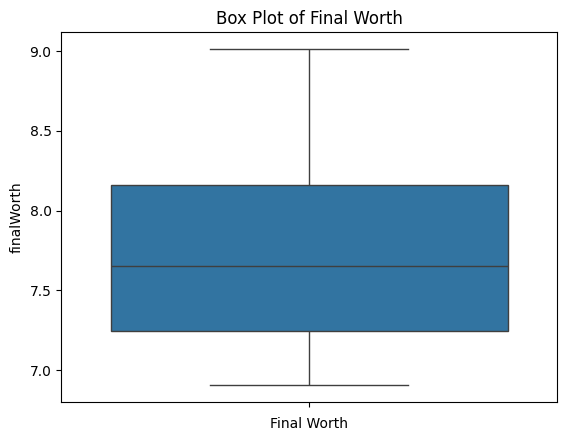

In [361]:
sns.boxplot(data['finalWorth'])
plot.title('Box Plot of Final Worth')
plot.xlabel('Final Worth')
plot.show()

In [362]:
data.head()

,rank,finalWorth,personName,age,country,source,industries,selfMade,gender,lastName,firstName,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,total_tax_rate_country,population_country
248,249,9.011889,Francis Choi,75.0,Hong Kong,Real estate,Real Estate,True,M,Choi,Francis,1.158287e+13,67.225671,101.8,43.963344,3.282395e+08
249,249,9.011889,German Khan,61.0,Russia,"Oil, banking, telecom",Energy,True,M,Khan,German,1.699877e+12,81.900000,102.6,46.200000,1.443735e+08
250,249,9.011889,Abdulsamad Rabiu,62.0,Nigeria,"Cement, sugar",Diversified,False,M,Rabiu,Abdulsamad,4.481204e+11,10.200000,84.7,34.800000,2.009636e+08
251,249,9.011889,George Roberts,79.0,United States,Private equity,Finance & Investments,True,M,Roberts,George,2.142770e+13,88.200000,101.8,36.600000,3.282395e+08
252,249,9.011889,Kushal Pal Singh,91.0,India,Real estate,Real Estate,False,M,Singh,Kushal Pal,2.611000e+12,28.100000,113.0,49.700000,1.366418e+09


## **Baseline**

In [363]:
y= data['finalWorth']


baseline_preds = np.ones(len(y)) * y.mean()

mse_baseline = mean_squared_error(y, baseline_preds)

print("Baseline Mean Squared Error:", mse_baseline)

Baseline Mean Squared Error: 0.3208229296883327


In [364]:
X= data.drop(columns=['finalWorth', 'rank','personName','lastName','lastName','firstName','source'])

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [366]:
X.head()

,age,country,industries,selfMade,gender,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,total_tax_rate_country,population_country
248,75.0,Hong Kong,Real Estate,True,M,1.158287e+13,67.225671,101.8,43.963344,3.282395e+08
249,61.0,Russia,Energy,True,M,1.699877e+12,81.900000,102.6,46.200000,1.443735e+08
250,62.0,Nigeria,Diversified,False,M,4.481204e+11,10.200000,84.7,34.800000,2.009636e+08
251,79.0,United States,Finance & Investments,True,M,2.142770e+13,88.200000,101.8,36.600000,3.282395e+08
252,91.0,India,Real Estate,False,M,2.611000e+12,28.100000,113.0,49.700000,1.366418e+09


In [367]:
numerical_features = ['age', 'gdp_country', 'gross_tertiary_education_enrollment',
                      'gross_primary_education_enrollment_country', 'total_tax_rate_country',
                      'population_country']
categorical_features = ['country', 'industries', 'selfMade', 'gender']

# Preprocessing for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## **Multiple Regression**

In [368]:
pipe = Pipeline([('encode', preprocessor), ('regressor', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('encode',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'gdp_country',
                                                   'gross_tertiary_education_enrollment',
                                                   'gross_primary_education_enrollment_country',
                                                   'total_tax_rate_country',
                                                   'population_country']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'industries',
                                                   'selfMade', 'gender'])])),
                ('regressor', LinearRegression())])

In [369]:
y_train_preds = pipe.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_preds)
print("Training MSE:", train_mse)

y_test_preds = pipe.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_preds)
print("Test MSE:", test_mse)

Training MSE: 0.28450735150404
Test MSE: 0.306377843680439


In [370]:
lr = pipeline.named_steps['regressor']

transformer = pipeline.named_steps['preprocessor']

# Get feature names from the ColumnTransformer
feature_names = transformer.get_feature_names_out()


coefficients = lr.coef_

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)

print(coefficients_df)


                                       Feature  Coefficient
23                        cat__country_Denmark     1.054455
50                        cat__country_Nigeria     0.927925
20                       cat__country_Colombia     0.914227
12                        cat__country_Belgium    -0.822640
27                        cat__country_Georgia     0.796127
..                                         ...          ...
84             cat__industries_Food & Beverage     0.009382
79  cat__industries_Construction & Engineering    -0.008449
98                               cat__gender_F     0.003673
99                               cat__gender_M    -0.003673
2     num__gross_tertiary_education_enrollment    -0.001635

[100 rows x 2 columns]


In [371]:
#find y-int
lr.intercept_

7.775624062394209

## **K-Nearest Neighbors Regression Model**

In [372]:
# Set up the pipeline with KNN and encoder
pipe_kn = Pipeline([
    ('encode', transformer),
    ('model', KNeighborsRegressor())
])

param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

grid_search = GridSearchCV(pipe_kn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

knn_best = grid_search.best_estimator_


y_train_preds = knn_best.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_preds)
print("Training MSE:", train_mse)

y_test_preds = knn_best.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_preds)
print("Test MSE:", test_mse)

Best Hyperparameters: {'model__n_neighbors': 50}
Training MSE: 0.29610734432526276
Test MSE: 0.3079731604666978


## **Random Forest**

In [373]:
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [374]:
param_grid = {'model__n_estimators': [50, 100, 150],'model__max_depth': [3, 4, 5]}

In [375]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'gdp_country',
                                                                          'gross_tertiary_education_enrollment',
                                                                          'gross_primary_education_enrollment_country',
                                                                          'total_tax_rate_country',
                                                                          'population_country']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['country',
                                                                          'industries',
                                                                          'selfMade',
                                                                          'gender'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [377]:
grid_search.best_params_

{'model__max_depth': 5, 'model__n_estimators': 100}

In [378]:
y_train_preds = pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_preds)
print("Training MSE:", train_mse)

Training MSE: 0.290871658418162


In [379]:
y_test_preds = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_preds)
print("Test MSE:", test_mse)

Test MSE: 0.28952704805141516


In [380]:
forest = grid_search.best_estimator_
r = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame(r['importances_mean'], index=X_test.columns, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                            Importance
age                                           0.035777
gross_primary_education_enrollment_country    0.025709
total_tax_rate_country                        0.018374
country                                       0.013795
industries                                    0.010471
gdp_country                                   0.007090
gross_tertiary_education_enrollment           0.003500
population_country                            0.002317
selfMade                                      0.001771
gender                                       -0.000502
